# Clasificacion Coches

Con el dataset de coches, creamos un modelo de red neuronal utilizando la tecnica de Transfer Learning. Esto permite reutilizar la red o modelo Resnet50 ya implementado. Podremos predecir la marca de un coche a traves de una imagen. Las marcas pueden ser Audi, Lamborghini o Mercedes.

In [1]:
# Importamos las librerias necesarias
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model
from glob import glob
from typing import List
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Clase procesador

In [2]:
class Procesador:

    TAMANO=[224,224]
    PESO="imagenet"

    def __init__(self, data:str)->None:

        self.train=os.path.join(os.getcwd(), data, "train")
        self.test=os.path.join(os.getcwd(), data, "test")

    # Metodo para obtener las carpetas
    def carpetas(self, test=False)->List[str]:

        if test:

            return glob(self.test+"\\*")

        return glob(self.train+"\\*")

In [3]:
# Creamos un objeto Procesador
procesador=Procesador("data")
procesador.test

'C:\\Users\\Admin\\Desktop\\Proyectos Python\\Proyectos Finales\\Coches ML App\\python\\src\\algoritmo\\data\\test'

### Red RESNET50

In [4]:
# Creamos la red con la capa inicial
red=ResNet50(input_shape=Procesador.TAMANO+[3], weights=Procesador.PESO, include_top=False)
red.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [5]:
# Reutilizamos los pesos ya existentes en la red
for capa in red.layers:
    capa.trainable=False

In [6]:
# Obtenemos las subcarpetas
carpetas=procesador.carpetas()
carpetas

['C:\\Users\\Admin\\Desktop\\Proyectos Python\\Proyectos Finales\\Coches ML App\\python\\src\\algoritmo\\data\\train\\audi',
 'C:\\Users\\Admin\\Desktop\\Proyectos Python\\Proyectos Finales\\Coches ML App\\python\\src\\algoritmo\\data\\train\\lamborghini',
 'C:\\Users\\Admin\\Desktop\\Proyectos Python\\Proyectos Finales\\Coches ML App\\python\\src\\algoritmo\\data\\train\\mercedes']

In [7]:
# Creamos una capa flatten
flatten=Flatten()(red.output)

In [8]:
# Creamos la capa de salida Densa
salida=Dense(len(carpetas), activation="softmax")(flatten)

### Modelo

In [9]:
# Creamos el modelo
modelo=Model(inputs=red.input, outputs=salida)
modelo.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [10]:
# Compilamos el modelo
modelo.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Data Augmentation

In [11]:
# Realizamos data augmentation en las imagenes de entrenamiento
gen_train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
imagenes_train=gen_train.flow_from_directory(procesador.train, target_size=tuple(Procesador.TAMANO), batch_size=32, class_mode="categorical")

Found 64 images belonging to 3 classes.


In [12]:
# En las imagenes test no hacemos nunca data augmentation
gen_test=ImageDataGenerator(rescale=1./255)
imagenes_test=gen_test.flow_from_directory(procesador.test, target_size=tuple(Procesador.TAMANO), batch_size=32, class_mode="categorical")

Found 58 images belonging to 3 classes.


### Entrenamiento modelo

In [13]:
resultado=modelo.fit_generator(imagenes_train, validation_data=imagenes_test, epochs=50, steps_per_epoch=len(imagenes_train), validation_steps=len(imagenes_test))

Epoch 1/50
2/2 [==============================] - 20s 12s/step - loss: 5.2150 - accuracy: 0.2812 - val_loss: 11.4497 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 13s 9s/step - loss: 10.7466 - accuracy: 0.3906 - val_loss: 1.3097 - val_accuracy: 0.4483
Epoch 3/50
2/2 [==============================] - 14s 10s/step - loss: 3.4145 - accuracy: 0.4062 - val_loss: 5.9140 - val_accuracy: 0.4138
Epoch 4/50
2/2 [==============================] - 14s 10s/step - loss: 6.7522 - accuracy: 0.4219 - val_loss: 5.5453 - val_accuracy: 0.4655
Epoch 5/50
2/2 [==============================] - 14s 10s/step - loss: 4.7586 - accuracy: 0.5312 - val_loss: 2.2038 - val_accuracy: 0.3448
Epoch 6/50
2/2 [==============================] - 16s 11s/step - loss: 1.5608 - accuracy: 0.4688 - val_loss: 3.6508 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 15s 11s/step - loss: 3.1334 - accuracy: 0.3906 - val_loss: 1.6663 - val_accuracy: 0.5345
Epoch 8/50
2/2 [==========

### Grafico

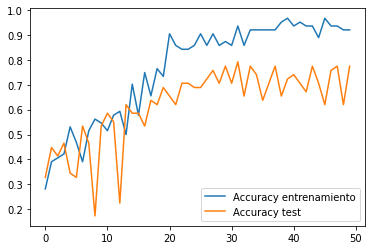

In [14]:
# Mostramos el grafico de los resultados obtenidos
plt.plot(resultado.history["accuracy"], label="Accuracy entrenamiento")
plt.plot(resultado.history["val_accuracy"], label="Accuracy test")
plt.legend()
plt.show()

### Guardado del modelo

In [15]:
modelo.save("modelo.h5")

### Prediccion de una imagen

In [16]:
# Cargamos el modelo
modelo_cargado=load_model("modelo.h5")

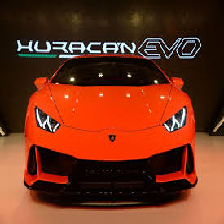

In [17]:
# Elegimos una imagen
ruta_imagen=os.path.join(procesador.test, "lamborghini", "10.jpg")
imagen=load_img(ruta_imagen, target_size=tuple(Procesador.TAMANO))
imagen

In [18]:
# Pasamos la imagen a array
imagen_array=img_to_array(imagen)
imagen_array

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [19]:
imagen_array.shape

(224, 224, 3)

In [20]:
# Reescalamos la imagen
imagen_reescalada=imagen_array/255

In [21]:
# Expandimos las dimensiones
imagen_expandida=np.expand_dims(imagen_reescalada, axis=0)
imagen_final=preprocess_input(imagen_expandida)
imagen_final.shape

(1, 224, 224, 3)

In [22]:
# Predecimos la imagen
resultado=modelo_cargado.predict(imagen_final)
resultado

1/1 [==============================] - 1s 1s/step


array([[0.01708659, 0.01856606, 0.96434736]], dtype=float32)

In [23]:
# Obtenemos la clase
np.argmax(resultado, axis=1)[0]

2